# "2019 February Portfolio BackTest"
> "2019 February portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [21]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [22]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [23]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [24]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [25]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190201].loc[df_testp.Date<20190301].sort_values(by='Date',ascending=True).copy().reset_index()

**Long-Short Portfolio**

In [26]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [27]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [28]:
#hide_input
df_testp

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,53,"Limelight Networks, Inc.",20190201,LLNW,-1.0,1.0,0.137132,0.358177,0.504691,0.993569,...,0.964630,0.996774,0.996785,0.996764,0.974026,1.000000,1.000000,1.000000,1.000000,0
1,54,AMAZON COM INC,20190201,AMZN,-1.0,1.0,0.135921,0.369006,0.495074,1.020034,...,0.992707,1.015612,1.004354,0.988817,0.984216,0.996785,0.993569,0.990354,0.964630,1
2,55,INTUITIVE SURGICAL INC,20190204,ISRG,-1.0,1.0,0.134265,0.375598,0.490138,0.999081,...,0.989702,0.998202,1.000881,0.975879,1.015097,1.001124,1.013474,0.998898,0.957595,2
3,56,Aptiv PLC,20190204,DLPH,-1.0,1.0,0.106898,0.343771,0.549331,1.010793,...,0.911495,0.995218,1.015650,0.948745,0.950478,1.002006,1.012543,0.973908,0.947734,3
4,70,MOBILE MINI INC,20190205,MINI,-1.0,1.0,0.162442,0.341578,0.495980,0.988082,...,0.986999,0.985413,1.002709,1.009046,0.989948,1.017687,1.023472,0.933963,0.863855,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1137,ISSUER DIRECT CORP,20190228,ISDR,1.0,1.0,0.154261,0.334917,0.510822,1.045420,...,1.048448,1.012463,1.032551,1.002896,1.000000,61.452994,88.547116,50.373456,1.584331,1225
1226,1138,TRIMAS CORP,20190228,TRS,-1.0,1.0,0.151180,0.352562,0.496257,0.991649,...,0.961955,1.012954,0.978967,0.991890,0.977987,63.453356,92.568938,52.813957,1.661089,1226
1227,1139,STEWART INFORMATION SERVICES CORP,20190228,STC,-1.0,1.0,0.144806,0.348905,0.506289,0.996972,...,0.993944,0.996276,1.000699,1.001402,0.995567,62.118736,91.795860,51.948154,1.597893,1227
1228,1169,ASBURY AUTOMOTIVE GROUP INC,20190228,ABG,-1.0,1.0,0.169958,0.366355,0.463687,0.957794,...,0.933138,0.965866,0.991642,0.989529,0.984568,62.162145,91.517885,51.863450,1.588215,1228


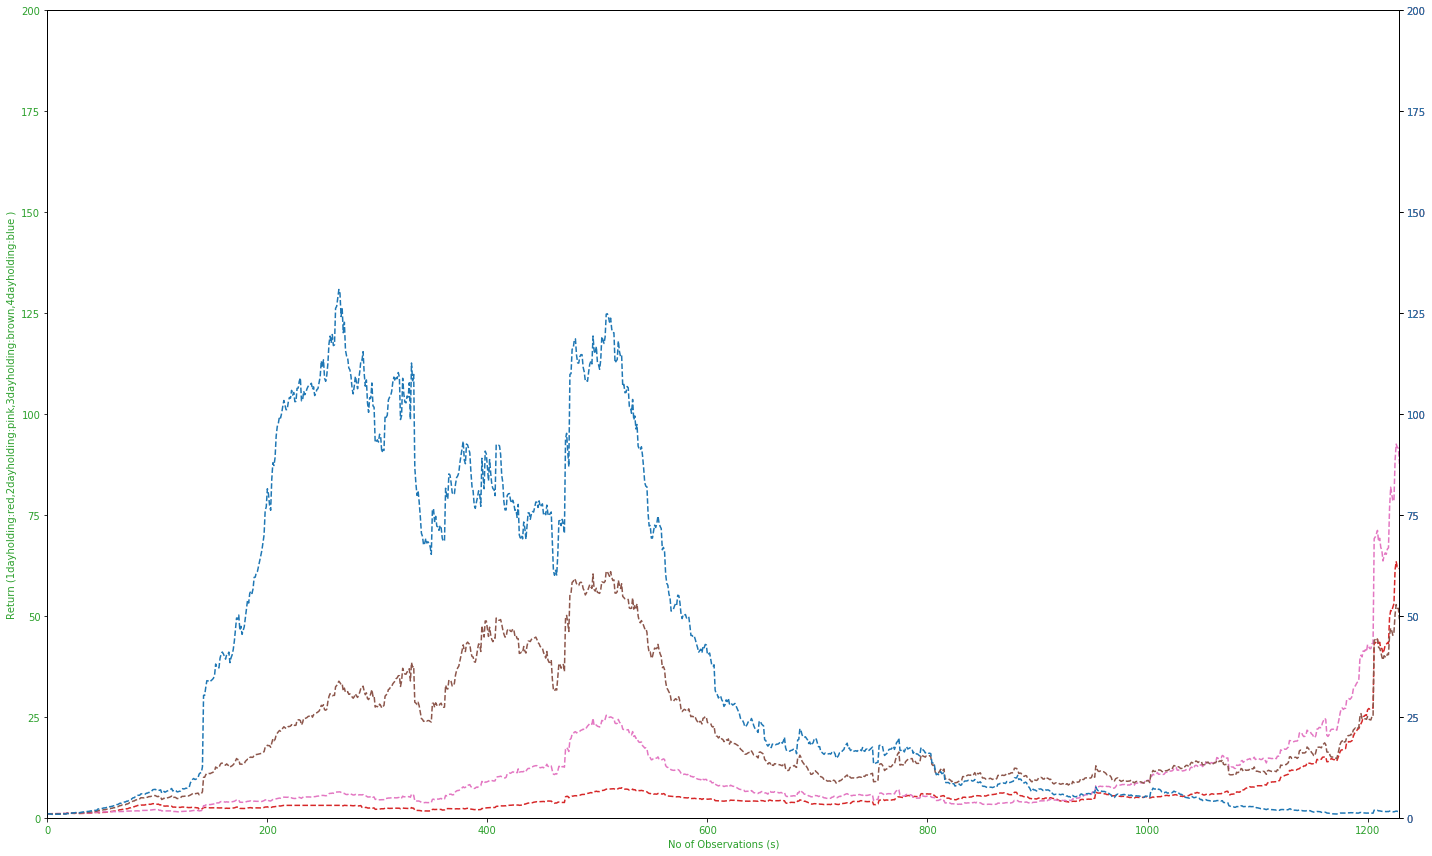

In [29]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,200
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [30]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='Date',ascending=True).reset_index()


In [31]:
#hide_input
df_long['indexx']=range(len(df_long))

In [32]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [33]:
#hide_input
df_long

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,53,"Limelight Networks, Inc.",20190201,LLNW,-1.0,1.0,0.137132,0.358177,0.504691,...,0.964630,0.996774,0.996785,0.996764,0.974026,1.000000,1.000000,1.000000,1.000000,0
1,1,54,AMAZON COM INC,20190201,AMZN,-1.0,1.0,0.135921,0.369006,0.495074,...,0.992707,1.015612,1.004354,0.988817,0.984216,0.996785,0.993569,0.990354,0.964630,1
2,2,55,INTUITIVE SURGICAL INC,20190204,ISRG,-1.0,1.0,0.134265,0.375598,0.490138,...,0.989702,0.998202,1.000881,0.975879,1.015097,1.001124,1.013474,0.998898,0.957595,2
3,3,56,Aptiv PLC,20190204,DLPH,-1.0,1.0,0.106898,0.343771,0.549331,...,0.911495,0.995218,1.015650,0.948745,0.950478,1.002006,1.012543,0.973908,0.947734,3
4,17,63,MAXLINEAR INC,20190205,MXL,1.0,1.0,0.120488,0.371977,0.507535,...,1.109929,0.991796,1.111449,0.998621,1.008283,1.017687,1.023472,0.933963,0.863855,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1085,1280,Kraton Corp,20190228,KRA,0.0,1.0,0.133599,0.354312,0.512089,...,0.998876,1.010653,1.002530,0.975867,1.010233,67.231758,85.798279,57.722858,1.688083,1203
1204,1086,1269,CVS HEALTH Corp,20190228,CVS,-1.0,1.0,0.135679,0.274506,0.589815,...,0.933771,0.962670,1.005188,0.982130,0.982533,67.401821,86.931646,57.073922,1.686185,1204
1205,1087,1255,FMC CORP,20190228,FMC,1.0,1.0,0.165691,0.349637,0.484673,...,1.010822,1.006629,1.010564,1.001646,0.992034,67.751476,84.120610,54.241445,1.574511,1205
1206,1075,1270,"Bonanza Creek Energy, Inc.",20190228,BCEI,-1.0,1.0,0.133531,0.396253,0.470216,...,0.967349,1.011465,1.025250,0.965575,0.966087,68.467222,85.572834,55.268692,1.591551,1206


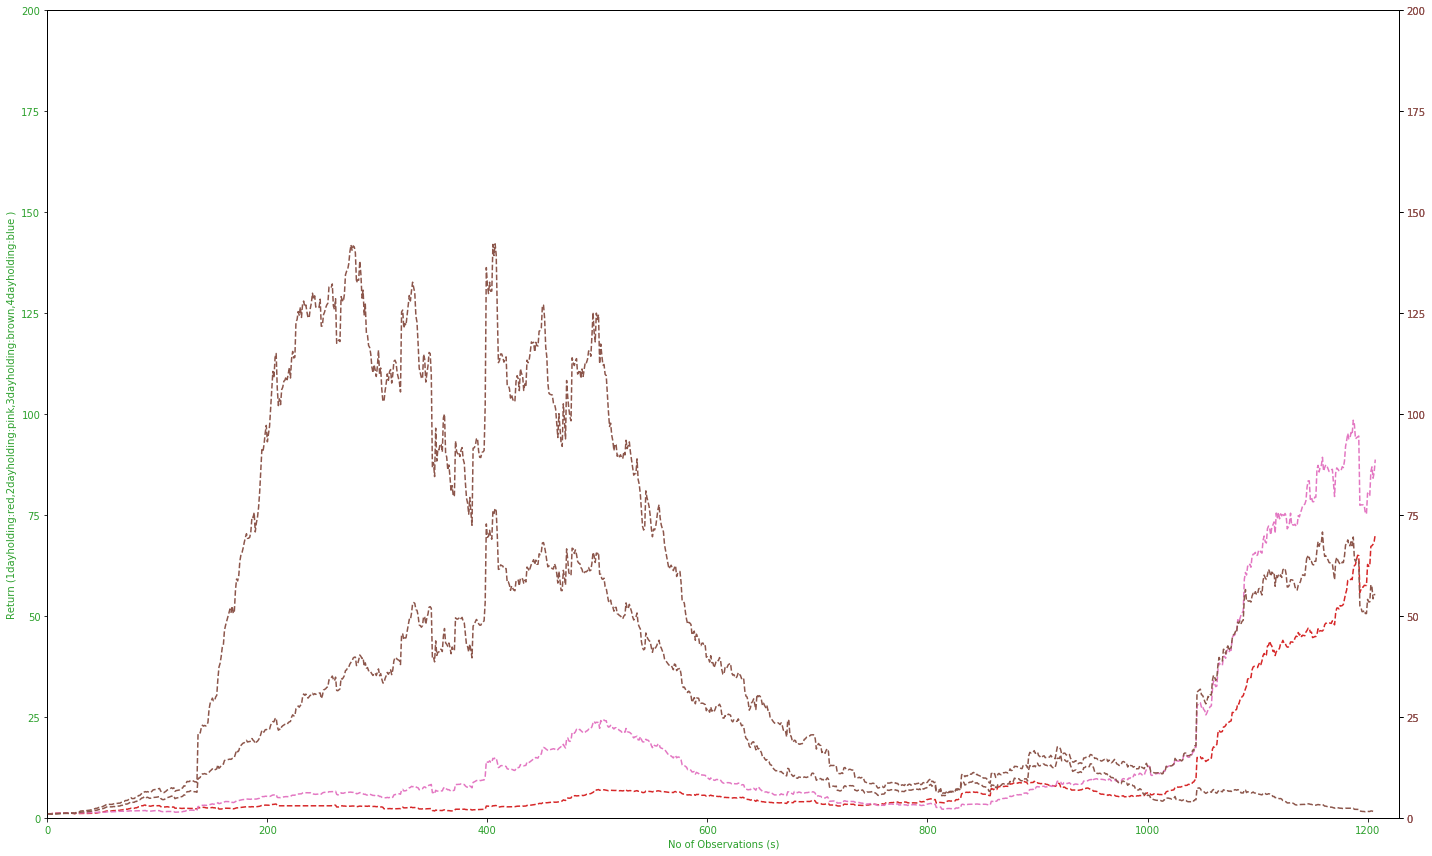

In [34]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,200

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [35]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='Date',ascending=True).reset_index()

In [36]:
#hide_input
df_short['indexx']=range(len(df_short))

In [37]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [38]:
#hide_input
df_short.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,9,65,MICROPAC INDUSTRIES INC,20190205,MPAD,1.0,-1.0,0.141181,0.440863,0.417957,...,0.972222,1.000000,1.000000,0.972222,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,28,76,COUSINS PROPERTIES INC,20190206,CUZ,1.0,-1.0,0.150216,0.427292,0.422492,...,0.966610,1.005376,0.966667,1.000000,0.994595,1.000000,1.000000,0.972222,0.972222,1
2,41,86,SEATTLE GENETICS INC /WA,20190207,SGEN,-1.0,-1.0,0.096372,0.475429,0.428200,...,1.063109,0.976776,1.118373,1.001052,0.972164,0.966667,0.971864,0.944868,0.939760,2
3,43,84,REGENERON PHARMACEUTICALS INC,20190207,REGN,1.0,-1.0,0.132176,0.499891,0.367933,...,0.985856,0.995945,0.999016,0.980833,1.010208,1.081094,1.061664,1.033260,0.999068,3
4,185,267,AGIOS PHARMACEUTICALS INC,20190214,AGIO,1.0,-1.0,0.102154,0.481492,0.416354,...,0.990288,1.000000,0.967433,1.026649,0.997054,1.080030,1.056318,1.008352,0.984937,4


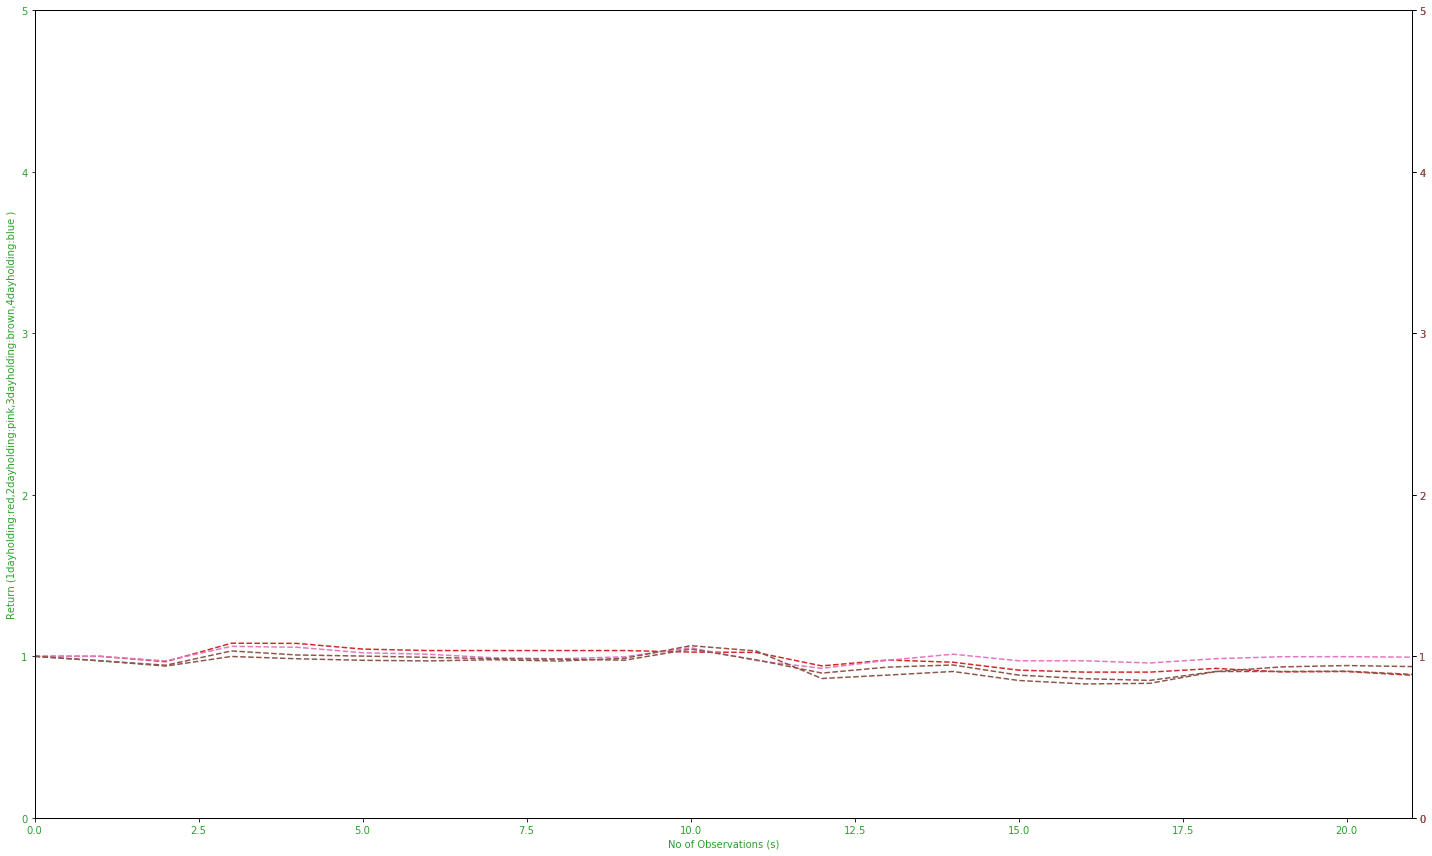

In [39]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,100
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()